In [ ]:
!pip install wordcloud textblob scikit-learn

CARGA DE DATOS

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd

# Carga de los datos
df = pd.read_csv("reviews.csv")

print("Primeras filas del dataset de entrenamiento:")
display(df.head())

# Mostrar info general del dataset
print("\nInformación del dataset:")
display(df.info())

# Mostrar estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Chequeo de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Seleccionar columnas relevantes
columns_of_interest = ['text', 'rating', 'verified_purchase', 'helpful_vote']
df = df[columns_of_interest]

# Eliminar filas con valores nulos en columnas clave ('text')
df.dropna(subset=['text'], inplace=True)

Primeras filas del dataset de entrenamiento:


,rating,title,text,timestamp,helpful_vote,verified_purchase
0,1,Received Used & scratched item! Purchased new!,Livid. Once again received an obviously used ...,1677373409298,1,True
1,5,Always works!,I ordered bags for my PANASONIC vacuum cleaner...,1675820743747,0,True
2,3,Arrived bent on one side. It would packed well...,Arrived bent on one side. It would packed well...,1672580149926,0,True
3,5,So fun and absolutely looks just like a real c...,Fantastic gift for a photographer or anyone wh...,1673115866299,0,True
4,5,Beautiful!!,This piece is beautiful and sturdy! The storag...,1675061336358,0,True



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7820 entries, 0 to 7819
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             7820 non-null   int64 
 1   title              7816 non-null   object
 2   text               7816 non-null   object
 3   timestamp          7820 non-null   int64 
 4   helpful_vote       7820 non-null   int64 
 5   verified_purchase  7820 non-null   bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 313.2+ KB


None


Estadísticas descriptivas:


,rating,timestamp,helpful_vote
count,7820.000000,7.820000e+03,7820.000000
mean,2.976343,1.675768e+12,0.302685
std,1.327960,1.966799e+09,1.579320
min,1.000000,1.672544e+12,0.000000
25%,2.000000,1.673968e+12,0.000000
50%,3.000000,1.675822e+12,0.000000
75%,4.000000,1.677532e+12,0.000000
max,5.000000,1.679325e+12,77.000000



Valores faltantes por columna:
rating               0
title                4
text                 4
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


<ipython-input-39-fa44d84eaee8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['text'], inplace=True)


CREACIÓN DE VARIABLES NUMÉRICAS ADICIONALES

In [ ]:
# Añadir una nueva columna con la longitud del texto de las reseñas
df['text_length'] = df['text'].apply(len)

# Crear una variable binaria para indicar si una reseña es útil (umbral: helpful_vote >= 1)
df['is_helpful'] = df['helpful_vote'].apply(lambda x: 1 if x >= 1 else 0)

# Verificar los cambios
print("\nPrimeras filas después de la limpieza:")
print(df.head())


Primeras filas después de la limpieza:
                                                text  rating  \
0  Livid.  Once again received an obviously used ...       1   
1  I ordered bags for my PANASONIC vacuum cleaner...       5   
2  Arrived bent on one side. It would packed well...       3   
3  Fantastic gift for a photographer or anyone wh...       5   
4  This piece is beautiful and sturdy! The storag...       5   

   verified_purchase  helpful_vote  text_length  is_helpful  
0               True             1          160           1  
1               True             0          156           0  
2               True             0           91           0  
3               True             0          101           0  
4               True             0          243           0  


ANÁLISIS UNIVARIADO


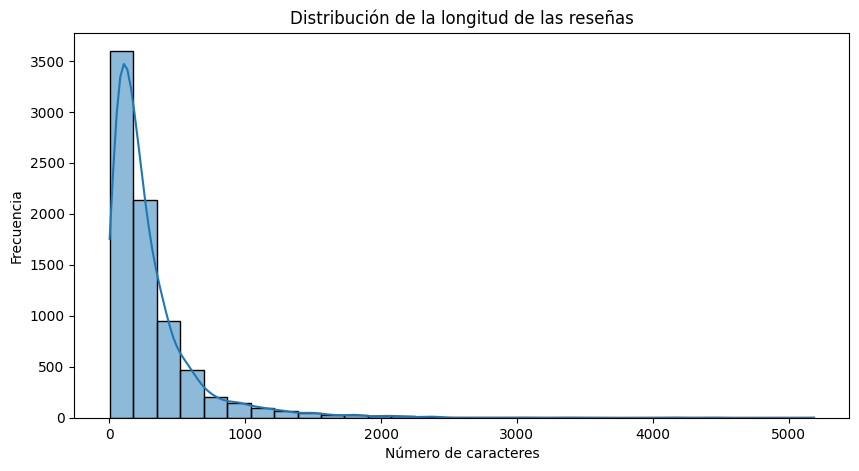

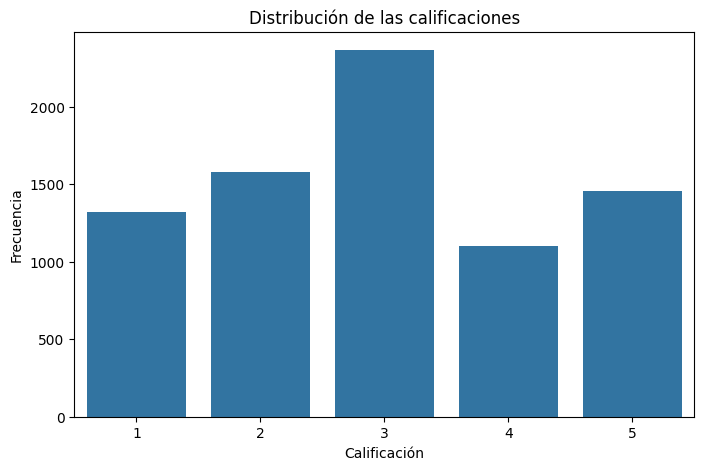

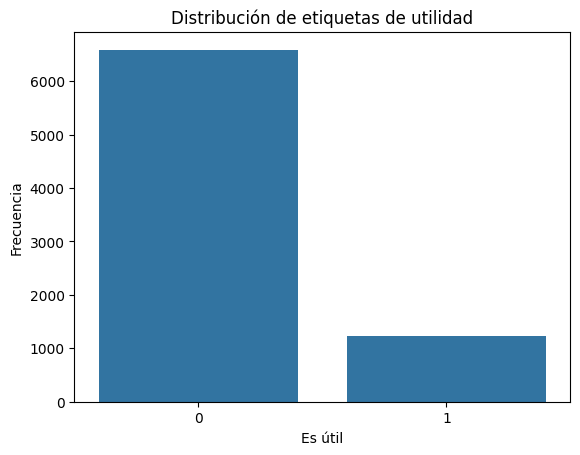

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis univariado
# Distribución de la longitud del texto de las reseñas
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribución de la longitud de las reseñas')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la variable 'rating'
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df)
plt.title('Distribución de las calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la variable 'is_helpful'
sns.countplot(x='is_helpful', data=df)
plt.title('Distribución de etiquetas de utilidad')
plt.xlabel('Es útil')
plt.ylabel('Frecuencia')
plt.show()

ANÁLISIS MULTIVARIADO

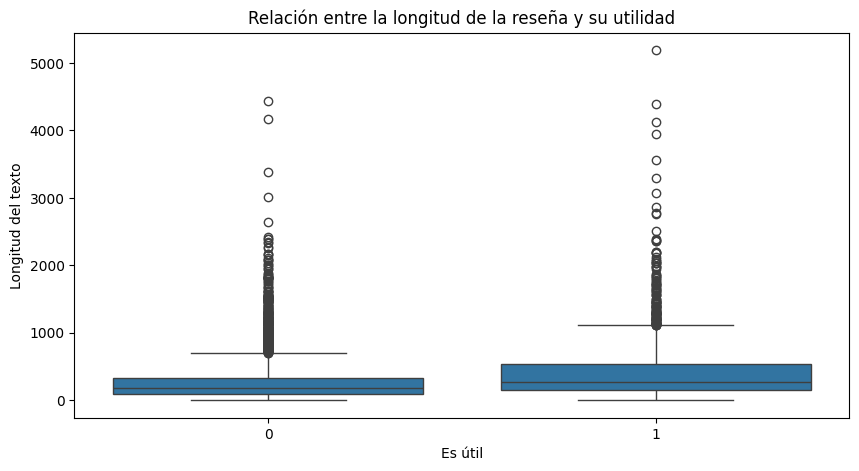

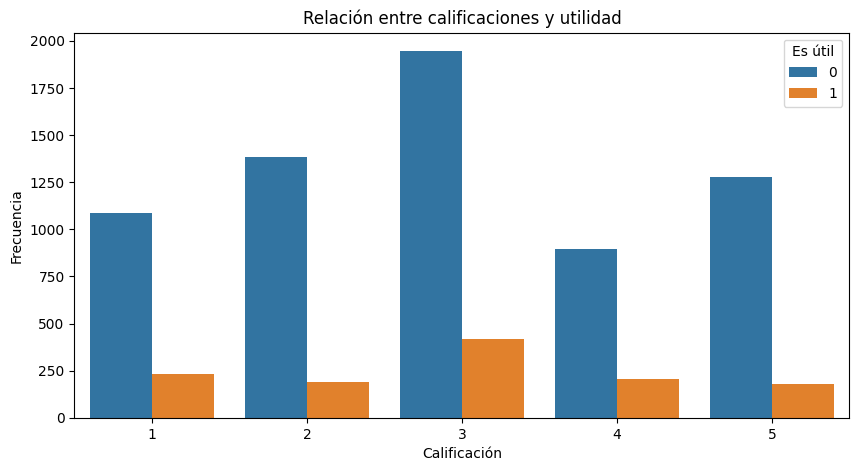

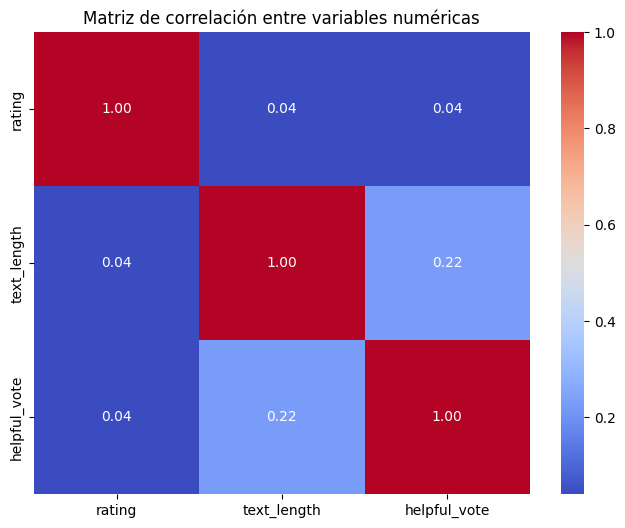

In [ ]:
# Análisis multivariado
# Relación entre la longitud de las reseñas y la utilidad
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_helpful', y='text_length', data=df)
plt.title('Relación entre la longitud de la reseña y su utilidad')
plt.xlabel('Es útil')
plt.ylabel('Longitud del texto')
plt.show()

# Relación entre calificaciones y utilidad
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='is_helpful', data=df)
plt.title('Relación entre calificaciones y utilidad')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.legend(title='Es útil')
plt.show()

# Correlación entre variables numéricas
correlation_matrix = df[['rating', 'text_length', 'helpful_vote']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización del texto
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = vectorizer.fit_transform(df['text']).toarray()

# Crear conjunto de características y etiquetas
X = np.hstack((X_text, np.array(df[['rating', 'text_length']])))
y = df['is_helpful']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODELO 1: REGRESIÓN LOGÍSTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

rl_model = LogisticRegression(max_iter=1000, random_state=42)

print("Entrenando el modelo de Regresión Logística...")
rl_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred = rl_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas para Regresión Logística:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Entrenando el modelo de Regresión Logística...

Métricas para Regresión Logística:
Accuracy: 0.8421
Precision: 0.6000
Recall: 0.0360
F1 Score: 0.0679


MODELO 2: LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Dividir los datos en entrenamiento y prueba
# Entrenar LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predicción
y_pred = lgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas para Regresión Logística:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


[LightGBM] [Info] Number of positive: 979, number of negative: 5273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33803
[LightGBM] [Info] Number of data points in the train set: 6252, number of used features: 1262
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156590 -> initscore=-1.683823
[LightGBM] [Info] Start training from score -1.683823

Métricas para Regresión Logística:
Accuracy: 0.8414
Precision: 0.5250
Recall: 0.0840
F1 Score: 0.1448


MODELO 3: RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Entrenando el modelo de Random Forest...")
rf_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas para Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Entrenando el modelo de Random Forest...

Métricas para Random Forest:
Accuracy: 0.8408
Precision: 0.5556
Recall: 0.0200
F1 Score: 0.0386


COMPARACIÓN DE MODELOS

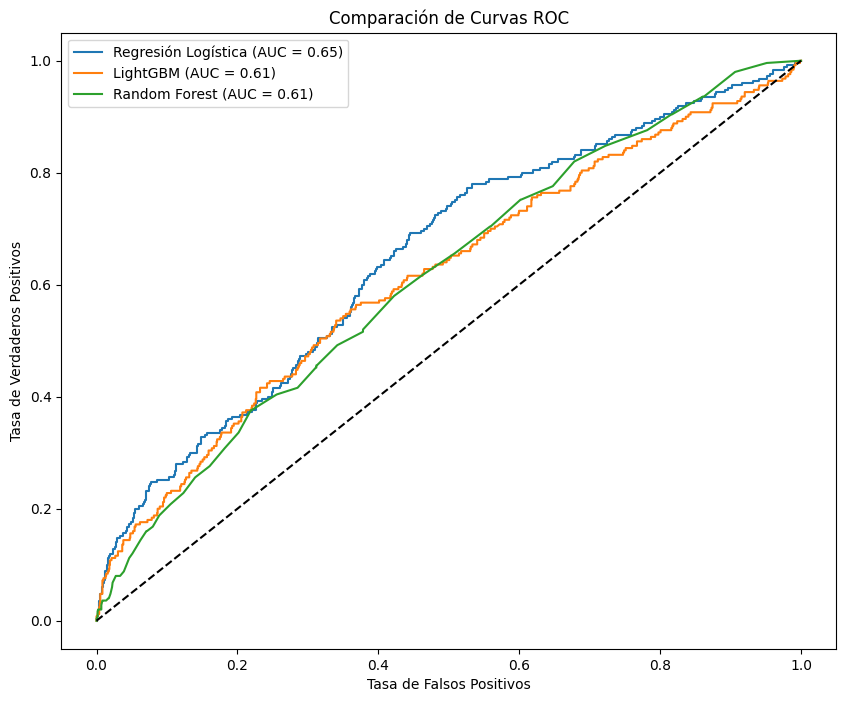

                Modelo  Exactitud  Precisión  Recall  F1 Score   ROC AUC
0  Regresión Logística   0.842072   0.600000   0.036  0.067925  0.649473
1             LightGBM   0.841432   0.525000   0.084  0.144828  0.614760
2        Random Forest   0.840793   0.555556   0.020  0.038610  0.613989


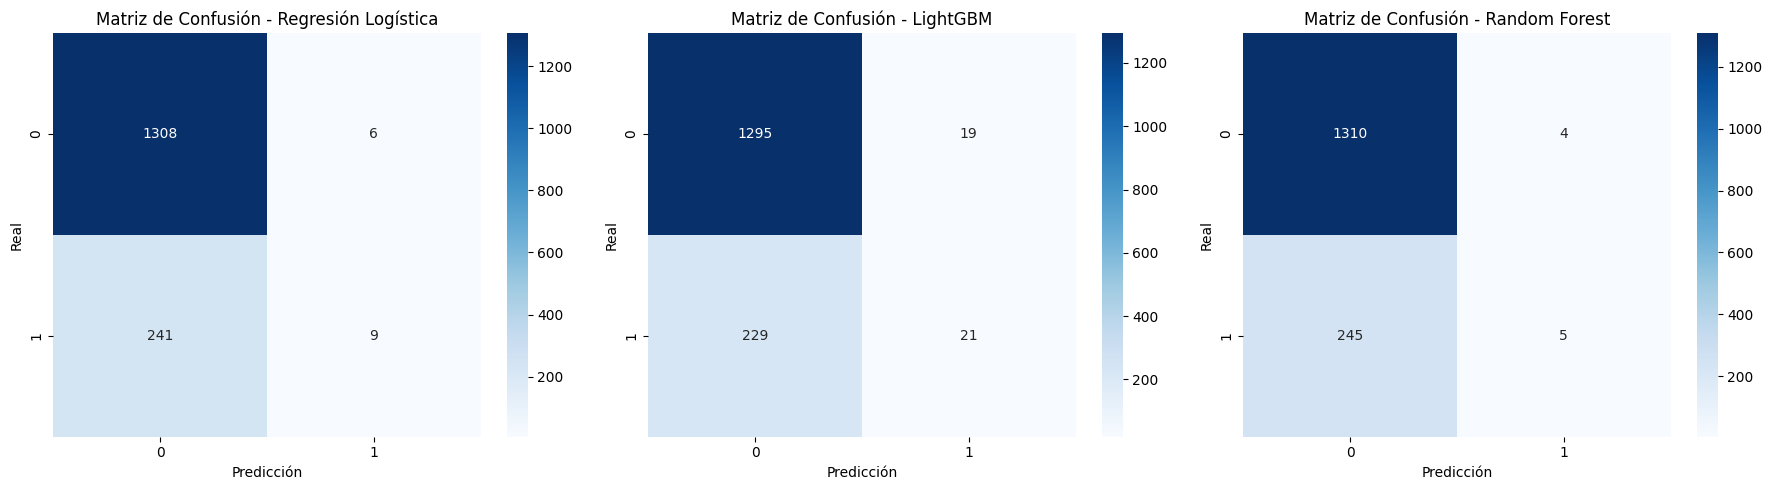

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import pandas as pd
import seaborn as sns

# Crear un diccionario de modelos
models = {
    'Regresión Logística': rl_model,
    'LightGBM': lgb_model,
    'Random Forest': rf_model
}

# Inicializar listas para almacenar las métricas
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Configurar el gráfico de la curva ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Obtener las probabilidades de predicción
    y_probs = model.predict_proba(X_test)[:, 1]
    # Obtener las predicciones
    y_pred = model.predict(X_test)

    # Calcular las métricas
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    roc_auc = roc_auc_score(y_test, y_probs)

    # Almacenar las métricas
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Personalizar y mostrar la curva ROC
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC')
plt.legend()
plt.show()

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'Modelo': model_names,
    'Exactitud': accuracy_scores,
    'Precisión': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})

print(metrics_df)

# Visualizar las matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Matriz de Confusión - {name}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()